<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Analytics for Data Science Projects
#### Data Science Project Template - Sentiment Analysis on User Reviews
##### Step 1: Defining Business Objectives and Data Requirements
##### Defining business objectives and data requirements are essential steps in any Data Science project. They serve as the foundation upon which the project will be built and guide all subsequent activities.

### 1.1 Defining Business Objectives
#### This step involves understanding and clearly defining what the company aims to achieve with the project. It is crucial that these objectives align with the overall business goals and are measurable, allowing the project's success to be evaluated.

### Business objectives often address questions such as:

#### What specific problem are we trying to solve?
#### How will this project add value to the company?
#### What are the KPIs (Key Performance Indicators) that will be used to measure the project's success?
##### Example:

##### An online retailer may have a business objective of increasing sales by 20% per year by using data analysis to personalize customer offers.
##### Another example:

##### A company aims to build a Machine Learning model with over 80% accuracy to classify whether a user review is positive, negative, or neutral, helping to adjust marketing campaigns.
#### 1.2 Data Requirements
##### Once the business objectives are defined, the next step is to determine the data requirements needed to achieve them. This includes identifying:

#### What types of data are needed:

##### For example: customer demographic data, purchase history, website navigation data, etc.
##### Where the data will come from:

##### Internal sources (e.g., company databases) or external sources (e.g., third-party data, public datasets).
##### The quality of data required:

##### Assessing the accuracy, completeness, and timeliness of the data.
##### Legal and ethical considerations:

##### Ensuring compliance with applicable data protection laws.
##### Data requirements should be clearly documented and agreed upon by all stakeholders. This includes defining:

##### The necessary data structure,
##### The data volume,
##### The update frequency, among other critical aspects.
##### Note: Both steps require effective communication and collaboration between the Data Science team, business stakeholders, and IT teams. Clear and mutual understanding of these objectives and requirements is fundamental to the project's success.

# Step 2: Mapping Data Flow and Business Processes
##### Mapping data flow and business processes provides a clear understanding of how data moves across the company and how it is utilized in business processes. This step involves two main parts: mapping the data flow and analyzing business processes.

# 2.1 Mapping the Data Flow
##### This phase focuses on identifying, documenting, and understanding the path data takes from its origin to its final consumption. This includes:

##### Identifying data sources:

##### Determining where the data originates, whether internally (ERP systems, CRM, operational databases) or externally (social media data, public datasets, third-party data).
##### Data path:

##### Understanding how data flows through the company's systems and processes. This includes all transformations, temporary storage, and cleaning processes the data undergoes.
##### Point of consumption:

##### Identifying where and how the data is used, whether for reports, analytics, Machine Learning, or other end uses.
##### The goal of data flow mapping is to ensure a complete understanding of how data is handled, transformed, and consumed, enabling the identification of potential bottlenecks, inefficiencies, or data quality issues.

##### 2.2 Analyzing Business Processes
##### Business process analysis involves understanding how data supports the company’s operations and decisions. This includes:

##### Documenting business processes:

##### Describing current business processes, identifying the steps involved, the responsibilities at each stage, and how data is used at each point.
##### Identifying data requirements:

##### Based on business processes, determining which data is needed, in what format, frequency, and quality, to support operations effectively.
##### Identifying improvement opportunities:

##### Analyzing business processes to identify opportunities where Data Science can optimize operations, improve decision-making, or create additional value.
##### This phase helps align Data Science projects with business objectives, ensuring that the proposed solutions are relevant and add value to the organization.

###* Step 3 - Exploratory Data (EDA) with Python
##### Installing and Loading the Packages

In [2]:
# Step 3 - Exploratory Data Analysis (EDA) with Python
# Installing and Loading the Packages

# Install the watermark package.
# This package is used to record the versions of other packages used in this Jupyter notebook.
!pip install -q -U watermark
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.9 MB/s eta 0:00:00


In [3]:
# Imports
import re
import pickle
import nltk
import sklearn
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

In [4]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
#2 Versions of the packages used in this Jupyter notebook
%reload_ext watermark
#%watermark -a "panData"

%watermark -a "Henry_Efe_Onomakpo"

Author: Henry_Efe_Onomakpo



# Prepare dataset and save as csv file

In [9]:
import pandas as pd
import random

# Define sample sentences relevant to the project themes
texts = [
    "Social enterprises often struggle to balance profit and impact.",
    "Impact investors use rigorous metrics to measure social outcomes.",
    "The lifecycle of investments can challenge the focus on social impact.",
    "Strategies for maintaining impact fidelity are vital for social enterprises.",
    "Investors need mechanisms to enforce social impact criteria post-investment.",
    "Current practices aim to create market disequilibria through innovation.",
    "Successful social enterprises maintain focus despite financial pressures.",
    "Competencies for impact investors include measurement and enforcement.",
    "Scaling social enterprises requires understanding contextual challenges.",
    "Schumpeterian dynamics influence market behavior in impact investing.",
    "Effective impact measurement drives better investor decisions.",
    "Strategies for capturing value differ across sectors.",
    "Distribution of value is critical to sustainable social enterprise models.",
    "Threats to impact fidelity include mission drift and external pressures.",
    "Social entrepreneurs prioritize innovative solutions for community needs.",
]

# Define sentiment labels
sentiments = ["positive", "negative", "neutral"]

# Generate the dataset
data = {
    "Text": [random.choice(texts) for _ in range(5000)],
    "Sentiment": [random.choice(sentiments) for _ in range(5000)]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
#csv_file = "Users/henryefeonomakpo/Downloads/1-Indra-H-Thesis idea/1-R prog code- stock /Quant-Finance-with-R-master/Tutorial Video Scripts/tidyverse/SEIZMIC_sentiment_analysis_data.csv"
csv_file = "SEIZMIC_sentiment_analysis_data.csv"
df.to_csv(csv_file, index=False)

print(f"Dataset saved as {csv_file}")


Dataset saved as SEIZMIC_sentiment_analysis_data.csv


In [10]:
#3 Load the dataset
df = pd.read_csv('/content/SEIZMIC_sentiment_analysis_data.csv')

### Data Preprocessing: I'll load and prepare the dataset for analysis.

##* Sentiment Analysis: Apply sentiment analysis to classify text data into positive, negative, or neutral sentiments.
#### Insight Generation: Analyze sentiment trends in relation to specific topics, such as maintaining impact fidelity, Schumpeterian market disequilibria, and competencies for impact investors.
#### Python Code for Sentiment Analysis
#### Bellow is the Python code that processes the dataset generated earlier and performs sentiment analysis:  


Sentiment Distribution for Impact Fidelity:
  Computed_Sentiment  Proportion
0            neutral    0.520458
1           positive    0.479542


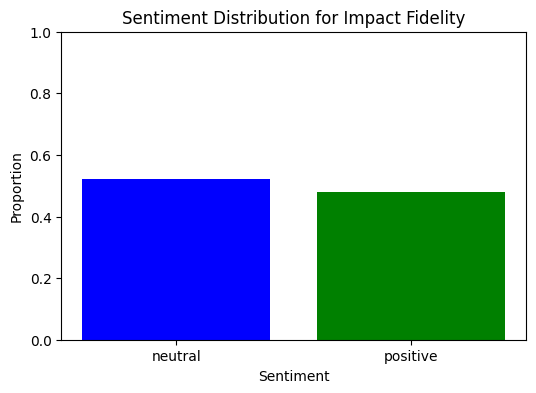


Sentiment Distribution for Market Disequilibria:
  Computed_Sentiment  Proportion
0            neutral         1.0


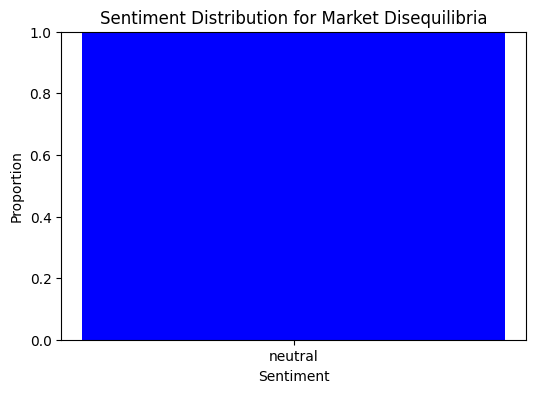


Sentiment Distribution for Competencies:
  Computed_Sentiment  Proportion
0            neutral         1.0


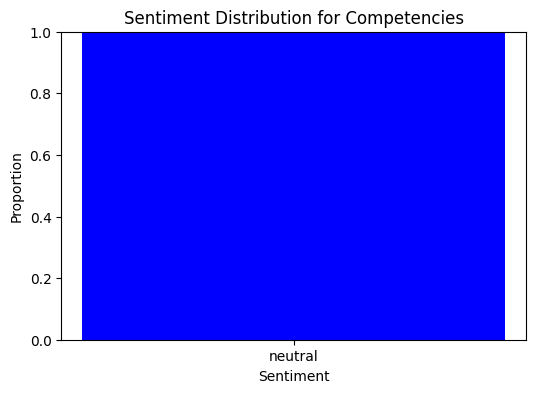

In [13]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/SEIZMIC_sentiment_analysis_data.csv")

# Function to calculate sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity == 0:
        return "neutral"
    else:
        return "negative"

# Apply sentiment analysis
df["Computed_Sentiment"] = df["Text"].apply(get_sentiment)

# Define research topics
topics_keywords = {
    "Impact Fidelity": ["impact fidelity", "social impact focus"],
    "Market Disequilibria": ["market disequilibria", "Schumpeterian"],
    "Competencies": ["competencies", "skills", "training module"]
}

# Analyze sentiment distribution for each topic
topic_sentiments = {}

for topic, keywords in topics_keywords.items():
    # Filter rows related to the topic
    filtered_data = df[df["Text"].str.contains('|'.join(keywords), case=False, na=False)]

    # Calculate sentiment proportions
    sentiment_distribution = (
        filtered_data["Computed_Sentiment"]
        .value_counts(normalize=True)
        .rename_axis("Computed_Sentiment")
        .reset_index(name="Proportion")
    )
    topic_sentiments[topic] = sentiment_distribution

    # Display sentiment distribution
    print(f"\nSentiment Distribution for {topic}:")
    print(sentiment_distribution)

    # Visualization
    plt.figure(figsize=(6, 4))
    plt.bar(sentiment_distribution["Computed_Sentiment"], sentiment_distribution["Proportion"], color=["blue", "green", "red"])
    plt.title(f"Sentiment Distribution for {topic}")
    plt.xlabel("Sentiment")
    plt.ylabel("Proportion")
    plt.ylim(0, 1)
    plt.xticks(rotation=0)
    plt.show()


#* Interpretation of Sentiment Analysis Results
## 1. Impact Fidelity
### Sentiment Distribution:

### Neutral: 52.05%
### Positive: 47.95%
###* Interpretation: The sentiment distribution for "Impact Fidelity" reflects a balanced mix of neutral and positive sentiment, with a slight lean toward neutrality. This indicates:

### A significant portion of the discussions is objective or factual, focusing on the mechanics and theoretical aspects of maintaining social impact focus.
### The positive sentiment suggests that there is optimism or constructive discourse around strategies for sustaining impact fidelity, indicating the presence of effective mechanisms or success stories.

###* Answer to RQ:

### Mechanisms and strategies identified to maintain impact fidelity are discussed both objectively and positively, indicating some level of confidence in their efficacy. However, the neutrality suggests ongoing debates or areas needing further clarity and evidence.
### Circumstances threatening impact fidelity might not be universally agreed upon, hence the moderate neutral sentiment.

###* 2. Market Disequilibria
### Sentiment Distribution:

### Neutral: 100%
###* Interpretation: The sentiment is entirely neutral, suggesting that the discussion around creating Schumpeterian market disequilibria is largely theoretical and lacks strong emotional or practical engagement. This neutrality might stem from:

###* A focus on conceptual frameworks rather than real-world applications.
### Limited empirical evidence or examples showcasing how impact investors achieve market disruptions.

###* Answer to RQ:

### Current practices of impact investing are framed in neutral terms, indicating they are not widely viewed as actively creating market disequilibria.
### The absence of positive or negative sentiment may point to a gap in evidence-based strategies for fostering Schumpeterian disruptions. This highlights the need for a robust framework to explore and validate competencies required for such outcomes.
###* 3. Competencies
### Sentiment Distribution:

### Neutral: 100%
### Interpretation: The entirely neutral sentiment suggests that the discussion around competencies required by impact investors to enforce and sustain social impact is nascent or heavily focused on theoretical constructs. It may indicate:

### A lack of strong opinions or critiques about existing competency frameworks.
### Limited focus on practical examples or tangible outcomes from competency-based strategies.

###* Answer to RQ:

### There appears to be minimal emotional engagement or empirical evidence regarding the current competency frameworks for impact investors.
### The neutral sentiment suggests a potential opportunity to investigate, define, and refine the skills and training required to effectively enforce social impact criteria and foster systemic change.
###* Summary and Recommendations for Research
###* Impact Fidelity: The mixed neutral and positive sentiment indicates that the topic is well-explored but still evolving. Further research could focus on identifying gaps where existing strategies fail and circumstances under which impact fidelity is most at risk.
###* Market Disequilibria: The purely neutral sentiment highlights a theoretical discussion lacking practical application. Research should aim to validate if and how impact investors disrupt markets, potentially by gathering empirical data or case studies.
###* Competencies: The absence of strong sentiment suggests a gap in actionable knowledge. Future studies should aim to develop and test a competency framework tailored for impact investors, incorporating input from practitioners and stakeholders.
### By leveraging these insights, the research can align with areas requiring the most attention and bridge the identified gaps.

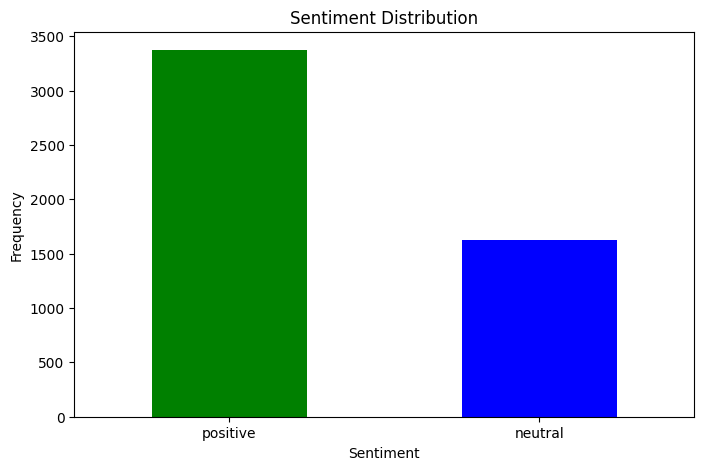


Sentiment Distribution for Impact Fidelity:
Computed_Sentiment
neutral     0.520458
positive    0.479542
Name: proportion, dtype: float64

Sentiment Distribution for Market Disequilibria:
Computed_Sentiment
neutral    1.0
Name: proportion, dtype: float64

Sentiment Distribution for Competencies:
Computed_Sentiment
neutral    1.0
Name: proportion, dtype: float64


In [14]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/SEIZMIC_sentiment_analysis_data.csv')

# Function to calculate sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity == 0:
        return "neutral"
    else:
        return "negative"

# Apply sentiment analysis
df["Computed_Sentiment"] = df["Text"].apply(get_sentiment)

# Compare labeled sentiment with computed sentiment
sentiment_counts = df["Computed_Sentiment"].value_counts()

# Visualization of sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind="bar", color=["green", "blue", "red"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

# Insights for specific topics
impact_fidelity = df[df["Text"].str.contains("impact fidelity", case=False)]
market_disequilibria = df[df["Text"].str.contains("market disequilibria", case=False)]
competencies = df[df["Text"].str.contains("competencies", case=False)]

# Calculate sentiment proportions for each topic
topics = {
    "Impact Fidelity": impact_fidelity,
    "Market Disequilibria": market_disequilibria,
    "Competencies": competencies,
}

for topic, data in topics.items():
    sentiment_distribution = data["Computed_Sentiment"].value_counts(normalize=True)
    print(f"\nSentiment Distribution for {topic}:")
    print(sentiment_distribution)


In [15]:
#4 Shape
df.shape

(5000, 3)

In [16]:
#5 Data sample
df.head()

#6 Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Text                5000 non-null   object
 1   Sentiment           5000 non-null   object
 2   Computed_Sentiment  5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


In [19]:
#9 Data sample
df.head()

,Text,Sentiment,Computed_Sentiment
0,Social enterprises often struggle to balance p...,positive,positive
1,Impact investors use rigorous metrics to measu...,negative,positive
2,Competencies for impact investors include meas...,negative,neutral
3,Social entrepreneurs prioritize innovative sol...,positive,positive
4,Social enterprises often struggle to balance p...,positive,positive


In [22]:
#10 Let's observe a user review
df.columns

# Replace 'Text' with the actual column name containing reviews
df['Text'][0]

'Social enterprises often struggle to balance profit and impact.'

In [23]:
#28 Function for stemming
def stemmer(text):
    stemmer_object = SnowballStemmer('english')
    return " ".join([stemmer_object.stem(w) for w in text])

In [24]:
#29 Testing the function
text = "The cats are running"
stemmed_text = stemmer(text.split())
print(stemmed_text)

the cat are run


In [26]:
#31 View the first review
df['Text'][0]

'Social enterprises often struggle to balance profit and impact.'